<a href="https://colab.research.google.com/github/pGaldino25/algoritmo_aglomeracao/blob/pGaldino25%2Fmain/model_whole_sale_customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans


In [ ]:
data = pd.read_csv("https://archive.ics.uci.edu/static/public/292/data.csv")
data = pd.read_csv(wholesale_customers.metadata)
del data["Channel"]
del data["Region"]
data.head()

In [18]:
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [24]:
## Atribuindo-se os valores a outro data frame
data_array = data.values

## Cria-se o objeto Kmeans com 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, random_state=1234)

## Gera-se uma nova coluna no data frame
data["clusters"] = kmeans.fit_predict(data_array)

data

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,clusters
0,12669,9656,7561,214,2674,1338,0
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,0
3,13265,1196,4221,6404,507,1788,0
4,22615,5410,7198,3915,1777,5185,3
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,3
436,39228,1431,764,4510,93,2346,2
437,14531,15488,30243,437,14841,1867,1
438,10290,1981,2232,1038,168,2125,0


In [31]:
## Utilizando-se GroupBy do Pandas
group = data.groupby("clusters")

## Ordenando pelos clusters
data.sort_values(by="clusters")

## Utilizando
group_count = data.groupby("clusters").size().reset_index(name='counts')
group_count

,clusters,counts
0,0,226
1,1,81
2,2,21
3,3,105
4,4,7


In [32]:
## Obtendo-se os valores médios (centros) para cada cluster
group.mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
clusters,,,,,,
0,6143.871681,3276.792035,4115.163717,2438.349558,1220.703540,992.539823
1,4991.481481,12140.543210,18505.506173,1591.111111,8148.246914,1822.407407
2,50512.095238,6987.523810,6478.095238,10215.380952,1030.523810,4904.761905
3,21774.600000,3934.209524,5149.200000,4183.123810,1112.542857,1696.923810
4,20031.285714,38084.000000,56126.142857,2564.571429,27644.571429,2548.142857


<Axes: title={'center': 'consumo por cluster'}, xlabel='clusters'>

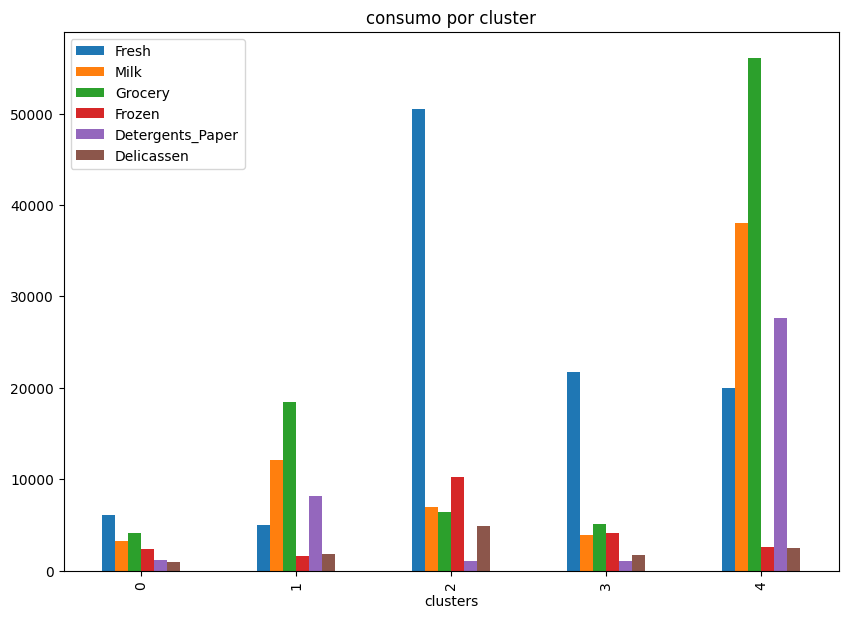

In [33]:

## Gerando o gráfico, mostrando as classes como conjunto de barras
group.mean().plot(kind="bar", figsize=(10,7), title="consumo por cluster")